In [5]:
#Imports
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#Merging all csv files in a folder into one csv file

csv_files = glob(os.path.join('Answers_011223', "*.csv"))

# Setzen Sie den Pfad zum Ordner mit CSV-Dateien
folder_path = 'Answers_011223'

# open the first file and append the others
with open(csv_files[0], 'r') as f:
    data = f.read()
with open('merged.csv', 'w') as f:
    f.write(data)
for csv in csv_files[1:]:
    with open(csv, 'r') as f:
        data = f.read()
    with open('merged.csv', 'a') as f:
        f.write(data)
print("CSV-Dateien erfolgreich zusammengeführt.")

CSV-Dateien erfolgreich zusammengeführt.


In [3]:
#load the merged file into a dataframe with manual column names
df = pd.read_csv('merged_CH_de_Fragen_2.csv', sep=',', header=None, names=['InternalID', 'Frage_CHde','Dialekt'])
df


,InternalID,Frage_CHde,Dialekt
0,302,Het Che Guevara Chind gha?,Bern
1,222,Isch rossrennä ä sport?,Bern
2,176,Wenn isch dr Olof Palme erschossä wordä,Bern
3,490,Weli Unternähme arbeite ir Luft- und Ruumfahrt...,Bern
4,394,Wie heisst dr höchst Bärg in Australie?,Bern
...,...,...,...
770,531,bi welem film het d kurosawa regie gführt?,Ostschweiz
771,398,i weller stadt hend die vereinte natione ihre ...,Ostschweiz
772,243,durch welli städt flüsst de weser,Ostschweiz
773,375,wer isch de bürgermeister vu tel aviv,Ostschweiz


Text(0, 0.5, 'Anzahl')

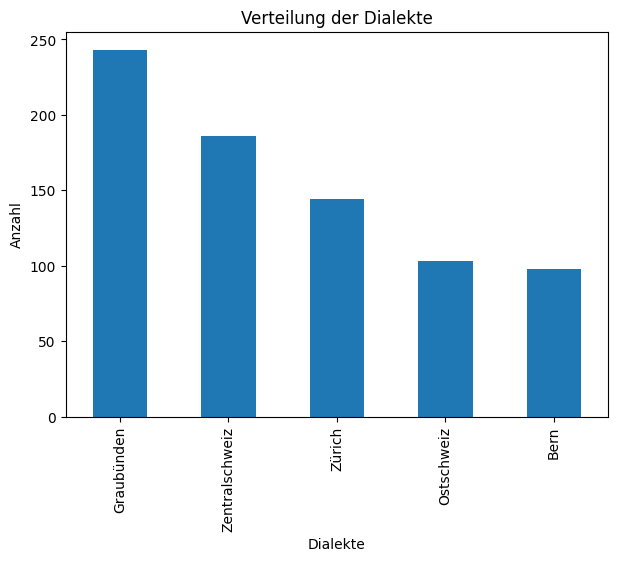

In [6]:
#plot histogram of the Dialket column
df['Dialekt'].value_counts().plot(kind='bar', title='Verteilung der Dialekte', figsize=(7,5))
# axis labels
plt.xlabel('Dialekte')
plt.ylabel('Anzahl')

In [9]:
#a list of all missing InternalIDs inbetween 1 and 557

missing = [x for x in range(0,557) if x not in df['InternalID'].tolist()]
print("Fehlende IDs: ", missing)
print("Anzahl fehlender IDs: ", len(missing))

Fehlende IDs:  []
Anzahl fehlender IDs:  0


In [10]:
#sort the dataframe by InternalID
df = df.sort_values(by=['InternalID'])
df

,InternalID,Frage_CHde,Dialekt
392,0,List alli Bretspiil vo GMT uf.,Zentralschweiz
382,1,Wer het Skype entwickled?,Zentralschweiz
383,2,Welli Persine sind in Heraklion gboore?,Zentralschweiz
591,3,Welli Persone sind in Herakolin gebore worde?,Zentralschweiz
647,4,wer isch bürgermeister vu new york city?,Graubünden
...,...,...,...
29,554,Welle Buech het am meiste Siitene?,Zürich
551,555,Welles isch die grössti Stadt in Amerika?,Zentralschweiz
297,556,Tuan alli Internetsiita vu Unternehma uflista ...,Graubünden
533,557,wia heissen dia drei Schiff vum Kolumbus?,Graubünden


In [11]:
#print random 10% of the dataframe
check = df['Frage_CHde'].sample(frac=0.1)

In [12]:
#write a new csv frile with check
check.to_csv('check.csv', sep=',', header=False, index=False)

In [23]:
#load the new csv file into a dataframe
df_check = pd.read_csv('check.csv', sep=',', header=None, names=['Frage_CHde', 'Check'])
df_check

,Frage_CHde,Check
0,List alli dänische Film uf.,ok
1,In welra Zitzona ligt Salt Lake City?,ok
2,Wenn isch de John Adams gebora?,ok
3,Für welli Musicals hät de Leonard Bernsetein d...,ok
4,Mit wem isch d Tochter fum Robert Kennedy verh...,ok
...,...,...
73,Wo isch Syngman Rhee bestattet?,ok
74,zell di englishe schaupieler uf wo in Lovesick...,ok
75,Wie gross isch d Claudia Schiffer?,ok
76,Welli Sprocha werdend in Pakistan gredet?,ok


<Axes: title={'center': 'Verteilung der Resultate der manuellen Prüfung'}, xlabel='Check'>

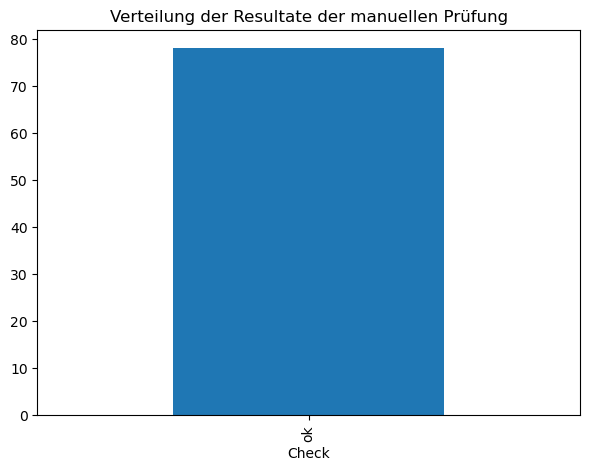

In [24]:
#plot histogram of the Check column
df_check['Check'].value_counts().plot(kind='bar', title='Verteilung der Resultate der manuellen Prüfung', figsize=(7,5))